In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets

In [2]:
data = pd.read_csv('D://semester 7//Data Mining/train.csv')

In [3]:
data.insert(value=data.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=12,column="Title")

In [4]:
title_map={"Capt":"Officer",
          "Col":"Officer",
          "Major":"Officer",
          "Johkheer":"Royalty",
          "Don":"Royalty",
          "Sir":"Royalty",
          "Dr":"Royalty",
          "Rev":"Officer",
          "The Countess":"Royalty",
          "Dona":"Royalty",
          "Mme":"Mrs",
          "Mlle":"Miss",
          "Ms":"Mrs",
          "Mr":"Mr",
          "Mrs":"Mrs",
          "Miss":"Miss",
          "Master":"Master",
          "Lady":"royalty"}
data["Title"]=data.Title.map(title_map)

In [5]:
def passenger_type (row): 
    if row['Age'] < 2 :
        return 'Infant'
    elif (row['Age'] >= 2 and row['Age'] < 12):
        return 'Child'
    elif (row['Age'] >= 12 and row['Age'] < 18):
        return 'Youth'
    elif (row['Age'] >= 18 and row['Age'] < 65):
        return 'Adult'
    elif row['Age'] >= 65 :
        return 'Senior' 
    elif row['Title'] == 'Master':
        return 'Child'
    elif row['Title'] == 'Miss' :
        return 'Child'
    elif row['Title'] == 'Mr' or row['Title'] == 'Mrs' :
        return 'Adult'
    else: 
        return 'Unknown'
data['PassengerType'] = data.apply(lambda row: passenger_type(row),axis=1)

Adult      726
Child       94
Youth       45
Infant      14
Senior      11
Unknown      1
Name: PassengerType, dtype: int64

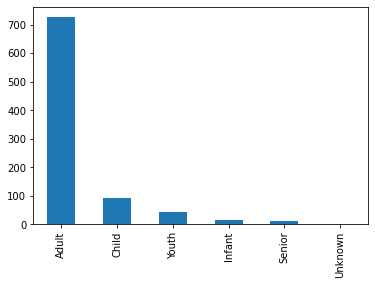

In [6]:
data['PassengerType'].value_counts().plot(kind='bar')
data['PassengerType'].value_counts()

In [7]:
sex_map={"male":1,"female":0}
data['Sex']=data["Sex"].map(sex_map)

In [8]:
passengerType_map={"Unknown":0,"Infant":1,"Child":2,"Youth":3,"Adult":4,"Senior":5}
data['PassengeType']=data["PassengerType"].map(passengerType_map)

Mr         517
Miss       184
Mrs        127
Master      40
Officer     11
Royalty      9
royalty      1
Name: Title, dtype: int64

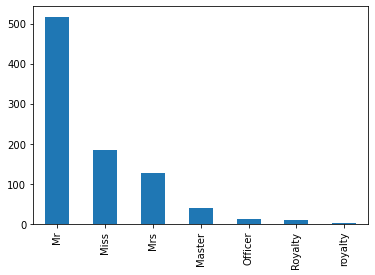

In [9]:
data['Title'].value_counts().plot(kind='bar')
data['Title'].value_counts()

In [10]:
Title_map={"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Officer":4,"Royalty":5, "royalty":6}
data['Title']=data["Title"].map(Title_map)

In [11]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType,PassengeType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,Adult,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2.0,Adult,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,Adult,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2.0,Adult,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0.0,Adult,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,4.0,Adult,4
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,1.0,Adult,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0,Child,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,0.0,Adult,4


In [12]:
data=data.drop(columns=['PassengerType'],axis=1)

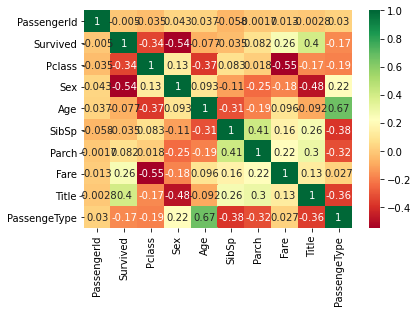

In [13]:
def titanic_corr(data):
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
titanic_corr(data)

In [14]:
data.drop(["PassengerId","Age","Parch","Name","Ticket","Embarked","Cabin"], inplace=True,axis=1)
data = data.drop([556, 759,822], axis=0)

In [15]:
data

,Survived,Pclass,Sex,SibSp,Fare,Title,PassengeType
0,0,3,1,1,7.2500,0.0,4
1,1,1,0,1,71.2833,2.0,4
2,1,3,0,0,7.9250,1.0,4
3,1,1,0,1,53.1000,2.0,4
4,0,3,1,0,8.0500,0.0,4
...,...,...,...,...,...,...,...
886,0,2,1,0,13.0000,4.0,4
887,1,1,0,0,30.0000,1.0,4
888,0,3,0,1,23.4500,1.0,2
889,1,1,1,0,30.0000,0.0,4


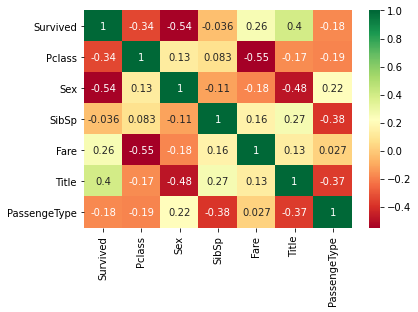

In [17]:
titanic_corr(data)

In [18]:
data=data.drop(columns=['Pclass'],axis=1)

In [19]:
data

,Survived,Sex,SibSp,Fare,Title,PassengeType
0,0,1,1,7.2500,0.0,4
1,1,0,1,71.2833,2.0,4
2,1,0,0,7.9250,1.0,4
3,1,0,1,53.1000,2.0,4
4,0,1,0,8.0500,0.0,4
...,...,...,...,...,...,...
886,0,1,0,13.0000,4.0,4
887,1,0,0,30.0000,1.0,4
888,0,0,1,23.4500,1.0,2
889,1,1,0,30.0000,0.0,4


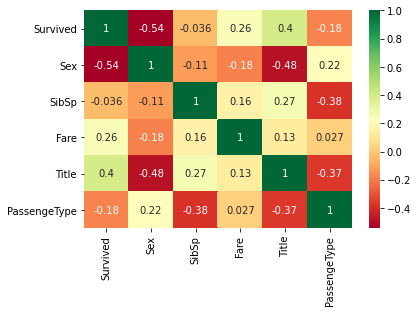

In [20]:
titanic_corr(data)

In [21]:
xdata = data.drop('Survived',axis=1)

In [22]:
ydata = data.Survived

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=0.3, random_state=1)

In [24]:
clf=DecisionTreeClassifier()

In [25]:
clf=clf.fit(xtrain,ytrain)

In [26]:
ypred=clf.predict(xtest)

In [27]:
print("Akurasi : ",metrics.accuracy_score(ytest,ypred)*100)

Akurasi :  79.40074906367042


In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(xtrain)

StandardScaler()

In [31]:
xtrain = scaler.transform(xtrain)

In [32]:
xtest = scaler.transform(xtest)

In [33]:
print("Akurasi : ",metrics.accuracy_score(ytest,ypred)*100)

Akurasi :  79.40074906367042


In [34]:
knn = KNeighborsClassifier(n_neighbors=4)

In [35]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=4)

In [36]:
y_pred_KNN = knn.predict(xtest)

In [37]:
cm_KNN = confusion_matrix(ytest, y_pred_KNN)

In [38]:
akurasi_KNN = metrics.accuracy_score(ytest, y_pred_KNN)*100

In [39]:
print (akurasi_KNN)

76.02996254681648


In [40]:
rep_KNN = classification_report(ytest, y_pred_KNN)

In [41]:
nb = GaussianNB()

In [42]:
nb.fit(xtrain, ytrain)

GaussianNB()

In [43]:
y_pred_NB = nb.predict(xtest)

In [45]:
cm_NB = confusion_matrix(ytest, y_pred_NB)

In [46]:
akurasi_NB = metrics.accuracy_score(ytest, y_pred_NB)*100

In [47]:
print (akurasi_NB)

78.65168539325843


In [50]:
rep_NB = classification_report(ytest, y_pred_NB)

In [51]:
print(rep_NB)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       147
           1       0.81      0.68      0.74       120

    accuracy                           0.79       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.79      0.79      0.78       267



In [52]:
print(rep_KNN)

              precision    recall  f1-score   support

           0       0.73      0.90      0.81       147
           1       0.83      0.58      0.69       120

    accuracy                           0.76       267
   macro avg       0.78      0.74      0.75       267
weighted avg       0.77      0.76      0.75       267



In [58]:
F1 = 2 * (precision * recall)

NameError: name 'precision' is not defined